In [2]:
import pandas as pd
data = pd.read_csv("datasets/prostate_cancer.txt")
data.head(5)

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       97 non-null     int64  
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     int64  
 4   lbph     97 non-null     float64
 5   svi      97 non-null     int64  
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     int64  
 8   pgg45    97 non-null     int64  
 9   lpsa     97 non-null     float64
 10  train    97 non-null     object 
dtypes: float64(5), int64(5), object(1)
memory usage: 8.5+ KB


The data information 

The data for this example come from a study by Stamey et al. (1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical prostatectomy. The goal is to predict the log of PSA (lpsa) from a number of measurements.

Variables:

lpsa	    log prostate specific antigen
lcavol	    log cancer volume
lweight	    log prostate weight
age	        age
lbph	    log of benign prostatic hyperplasia amount
svi	        seminal vesicle invasion
lcp	        log of capsular penetration
gleason	    Gleason score
pgg45	    percent of Gleason scores 4 or 5

This is a supervised learning problem, known as a regression problem, because the outcome measurement is quantitative.

In [23]:
X = data.drop(['id', 'lpsa', 'train'], axis='columns') 
y = data['lpsa']  # Target variable


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
print(X_train.shape, X_test.shape)


(77, 8) (20, 8)


In [1]:
import pandas as pd

target = 'lpsa'
features = ['lcavol', 'lweight', 'age', 'lbph',
            'svi', 'lcp', 'gleason', 'pgg45']

df = pd.read_csv("datasets/prostate_cancer.txt")
df.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


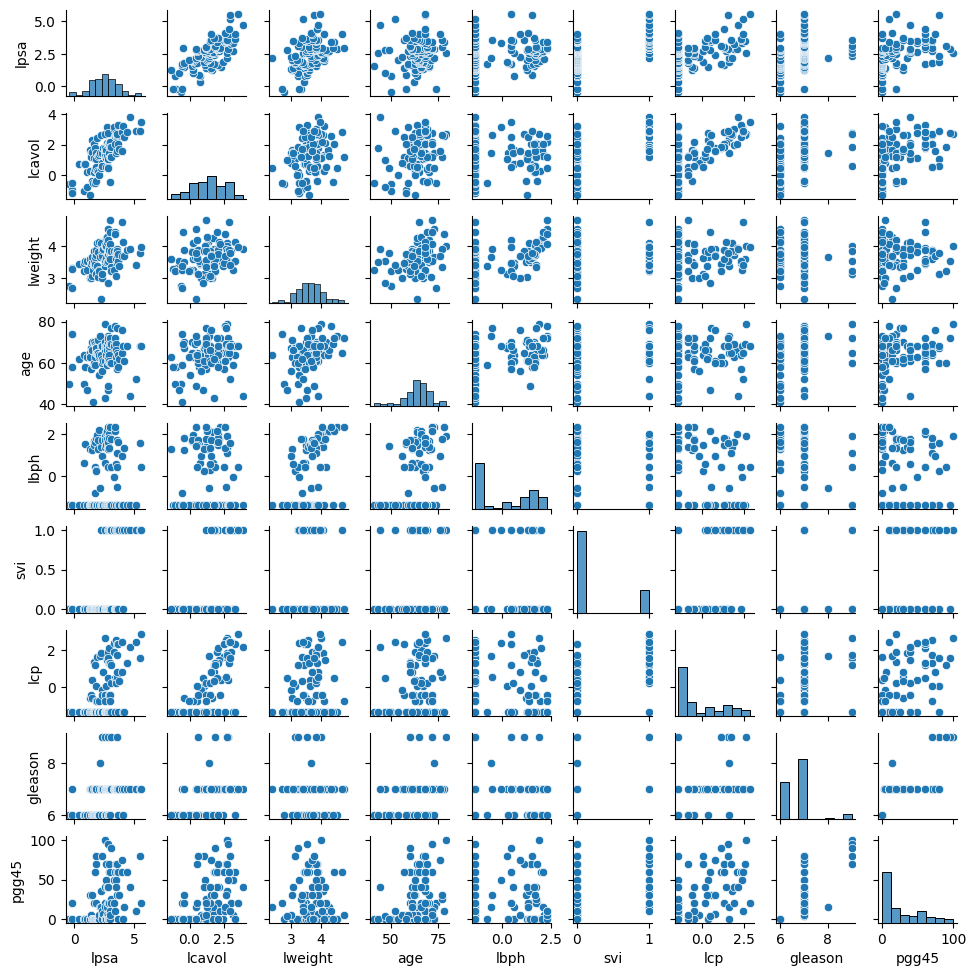

In [2]:
import seaborn as sns
sns.pairplot(df, vars=[target]+features, kind="scatter", height=1.1)

In [4]:
df.shape

(97, 11)

In [2]:
import pandas as pd

target = 'lpsa'
features = ['lcavol', 'lweight', 'age', 'lbph',
            'svi', 'lcp', 'gleason', 'pgg45']

df = pd.read_csv("datasets/prostate_cancer.txt")

is_train = df.train == 'T'
X, y = df[features].values, df[target].values
X_train, y_train = X[is_train], y[is_train]
X_test, y_test = X[~is_train], y[~is_train]

print(X_train.shape, X_test.shape)

(67, 8) (30, 8)


In [11]:
df['train'][6]

'F'

In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# data preprocessing: normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
ridge_model = Ridge(alpha=10) 
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.48771379233500395
Mean Absolute Error: 0.518391781339515
R-squared: 0.5353528201459817


### Toy Dataset creation

In [29]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Set a seed for reproducibility
np.random.seed(42)

# Generate data
x = np.random.uniform(low=0, high=10, size=(1000, 1))
# y = 2 * x + np.random.normal(loc=0, scale=2, size=(1000, 1))  # Adding some noise
y = 2 * x

# Create DataFrame
data = pd.DataFrame({'X': x.flatten(), 'Y': y.flatten()})

# Shuffle the dataset
data = shuffle(data, random_state=42)

# Save the dataset to a CSV file
data.to_csv('datasets/toy_dataset.csv', index=False)

# Display the first few rows of the dataset
print(data.head())


            X          Y
521  3.808909   9.601902
737  8.165994  17.593612
740  4.626798  11.695663
660  3.560967   8.447697
411  9.500620  16.333188


### Experiments on Toy dataset

In [34]:
data = pd.read_csv("datasets/toy_dataset.csv")
data.shape



(1000, 2)

In [35]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = data[['X']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data preprocessing: normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the linear regression model
ridge_model = Ridge(alpha=0) 
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 6.519234343151906e-31
Mean Absolute Error: 3.6345926268666064e-16
R-squared: 1.0


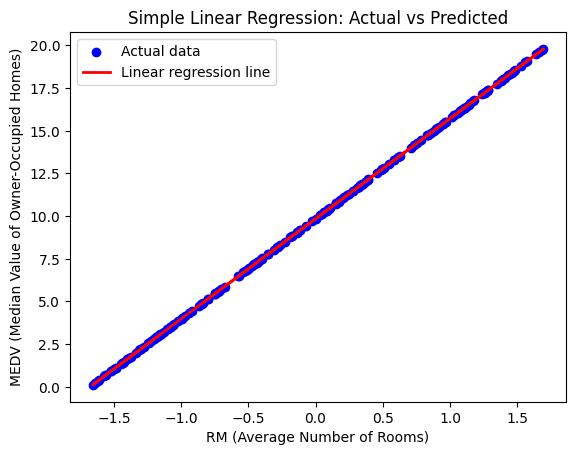

In [36]:
import matplotlib.pyplot as plt

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression line')
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.xlabel("RM (Average Number of Rooms)")
plt.ylabel("MEDV (Median Value of Owner-Occupied Homes)")
plt.legend()
plt.show()